## Aplicação de Algoritmo de Aprendizagem de Máquina para Predição de Dados da Produção de Campos de Óleo e Gás da Bacia de Campos

>**Autora: Eloísa Moreira de Lira**
>
>Universidade de Maringá -UNICESUMAR
>
>Código Fonte para Artigo de Conclusão de Curso 
>
>Bacharelado em Eng. de Software 

### Carregamento de Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Carregamento de Dados**

Produção de petróleo e gás natural (.csv) Produção em mar

In [2]:
file=r'00_producao-petroleo-m3-1997-2023.csv'
dado_raw=pd. read_csv(file, sep=';',encoding='utf-8')
dado_raw=pd.DataFrame(dado_raw)

## Dado carregado de produção Marinha entre 1997 até 2023

In [3]:
dado_raw.head(10)

,ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,LOCALIZAÇÃO,PRODUÇÃO
0,1997,JAN,REGIÃO SUDESTE,RIO DE JANEIRO,PETRÓLEO,MAR,2767443
1,1997,FEV,REGIÃO SUDESTE,RIO DE JANEIRO,PETRÓLEO,MAR,2891003
2,1997,MAR,REGIÃO SUDESTE,RIO DE JANEIRO,PETRÓLEO,MAR,2998305
3,1997,ABR,REGIÃO SUDESTE,RIO DE JANEIRO,PETRÓLEO,MAR,2863184
4,1997,MAI,REGIÃO SUDESTE,RIO DE JANEIRO,PETRÓLEO,MAR,2873644
5,1997,JUN,REGIÃO SUDESTE,RIO DE JANEIRO,PETRÓLEO,MAR,2905804
6,1997,JUL,REGIÃO SUDESTE,RIO DE JANEIRO,PETRÓLEO,MAR,3026789
7,1997,AGO,REGIÃO SUDESTE,RIO DE JANEIRO,PETRÓLEO,MAR,2932331
8,1997,SET,REGIÃO SUDESTE,RIO DE JANEIRO,PETRÓLEO,MAR,2832661
9,1997,OUT,REGIÃO SUDESTE,RIO DE JANEIRO,PETRÓLEO,MAR,2525463


**Sabendo que a Bacia de Campos fica localizada em toda a parte offshore, no Sudeste do Brasil, vamos fazer a filtragem dos dados.**


**Precisamos nos certificar que o dado compreeenda o produto :petroleo, região Sudeste do Brasil, porção marinha e estados RJ-SP-ES**

In [4]:
dado_raw_rs= dado_raw.loc[dado_raw['GRANDE REGIÃO']== 'REGIÃO SUDESTE']
dado_raw_rs_off=dado_raw_rs.loc[dado_raw_rs['LOCALIZAÇÃO']=='MAR']

**Controle de dados Carregados**

In [5]:
print(dado_raw_rs_off['LOCALIZAÇÃO'].unique().sum())
print(dado_raw_rs_off['UNIDADE DA FEDERAÇÃO'].unique().sum())
print(dado_raw_rs_off['PRODUTO'].unique().sum())

MAR
RIO DE JANEIROESPÍRITO SANTOSÃO PAULO
PETRÓLEO


In [6]:
aux=pd.DataFrame(dado_raw_rs_off, columns=['MÊS','ANO'])

In [7]:
dado_raw_rs_off['mes_num']=dado_raw_rs_off['MÊS']
dado_raw_rs_off['mes_num'].replace(to_replace='JAN', value=1, inplace=True)
dado_raw_rs_off['mes_num'].replace(to_replace='FEV',value=2, inplace=True)
dado_raw_rs_off['mes_num'].replace(to_replace='MAR',value=3, inplace=True)
dado_raw_rs_off['mes_num'].replace(to_replace='ABR',value=4, inplace=True)
dado_raw_rs_off['mes_num'].replace(to_replace='MAI',value=5, inplace=True)
dado_raw_rs_off['mes_num'].replace(to_replace='JUN',value=6, inplace=True)
dado_raw_rs_off['mes_num'].replace(to_replace='JUL',value=7, inplace=True)
dado_raw_rs_off['mes_num'].replace(to_replace='AGO',value=8, inplace=True)
dado_raw_rs_off['mes_num'].replace(to_replace='SET',value=9, inplace=True)
dado_raw_rs_off['mes_num'].replace(to_replace='OUT',value=10, inplace=True)
dado_raw_rs_off['mes_num'].replace(to_replace='NOV',value=11, inplace=True)
dado_raw_rs_off['mes_num'].replace(to_replace='DEZ',value=12, inplace=True)

C:\Users\ur9j\AppData\Local\Temp\ipykernel_26272\2930710609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dado_raw_rs_off['mes_num']=dado_raw_rs_off['MÊS']
C:\Users\ur9j\AppData\Local\Temp\ipykernel_26272\2930710609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dado_raw_rs_off['mes_num'].replace(to_replace='JAN', value=1, inplace=True)
C:\Users\ur9j\AppData\Local\Temp\ipykernel_26272\2930710609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [8]:
dado_raw_rs_off['TEMPO']=dado_raw_rs_off['MÊS'].astype(str)+ '/' +dado_raw_rs_off['ANO'].astype(str)

def formatar_data(row):
    return f"{row['mes_num']:02d}/{row['ANO']:04d}"

dado_raw_rs_off['TEMPO_num'] = dado_raw_rs_off.apply(formatar_data, axis=1)

C:\Users\ur9j\AppData\Local\Temp\ipykernel_26272\100743351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dado_raw_rs_off['TEMPO']=dado_raw_rs_off['MÊS'].astype(str)+ '/' +dado_raw_rs_off['ANO'].astype(str)
C:\Users\ur9j\AppData\Local\Temp\ipykernel_26272\100743351.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dado_raw_rs_off['TEMPO_num'] = dado_raw_rs_off.apply(formatar_data, axis=1)


In [9]:
dado_raw_rs_off

,ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,LOCALIZAÇÃO,PRODUÇÃO,mes_num,TEMPO,TEMPO_num
0,1997,JAN,REGIÃO SUDESTE,RIO DE JANEIRO,PETRÓLEO,MAR,2767443,1,JAN/1997,01/1997
1,1997,FEV,REGIÃO SUDESTE,RIO DE JANEIRO,PETRÓLEO,MAR,2891003,2,FEV/1997,02/1997
2,1997,MAR,REGIÃO SUDESTE,RIO DE JANEIRO,PETRÓLEO,MAR,2998305,3,MAR/1997,03/1997
3,1997,ABR,REGIÃO SUDESTE,RIO DE JANEIRO,PETRÓLEO,MAR,2863184,4,ABR/1997,04/1997
4,1997,MAI,REGIÃO SUDESTE,RIO DE JANEIRO,PETRÓLEO,MAR,2873644,5,MAI/1997,05/1997
...,...,...,...,...,...,...,...,...,...,...
6991,2023,AGO,REGIÃO SUDESTE,ESPÍRITO SANTO,PETRÓLEO,MAR,0,8,AGO/2023,08/2023
6992,2023,SET,REGIÃO SUDESTE,ESPÍRITO SANTO,PETRÓLEO,MAR,0,9,SET/2023,09/2023
6993,2023,OUT,REGIÃO SUDESTE,ESPÍRITO SANTO,PETRÓLEO,MAR,0,10,OUT/2023,10/2023
6994,2023,NOV,REGIÃO SUDESTE,ESPÍRITO SANTO,PETRÓLEO,MAR,0,11,NOV/2023,11/2023


In [10]:
data_trat=pd.DataFrame(columns=['tempo_num','producao','ano','mes'])
data_trat.tempo_num=dado_raw_rs_off['TEMPO_num']
data_trat.producao=dado_raw_rs_off['PRODUÇÃO']
data_trat.ano=dado_raw_rs_off['ANO']
data_trat.mes=dado_raw_rs_off['MÊS']
data_trat
data_trat.loc[(data_trat['producao'])=='0']

,tempo_num,producao,ano,mes
6940,05/2023,0,2023,MAI
6941,06/2023,0,2023,JUN
6942,07/2023,0,2023,JUL
6943,08/2023,0,2023,AGO
6944,09/2023,0,2023,SET
6945,10/2023,0,2023,OUT
6946,11/2023,0,2023,NOV
6947,12/2023,0,2023,DEZ
6964,05/2023,0,2023,MAI
6965,06/2023,0,2023,JUN


## **Tratamento de dados ausentes ou anomalias**


Identificação e tratamento de quaisquer dados ausentes ou anomalias que possam afetar a qualidade da série temporal.

Não ha presenca de dados faltantes logo, não precisara utilizar nenhum mecanismo de preenchimento. Conforme codigo abaixo:


In [11]:
data_trat_unif=data_trat[data_trat['producao']!=0]
data_trat_unif.loc[(data_trat_unif['producao'])=='0']

,tempo_num,producao,ano,mes
6940,05/2023,0,2023,MAI
6941,06/2023,0,2023,JUN
6942,07/2023,0,2023,JUL
6943,08/2023,0,2023,AGO
6944,09/2023,0,2023,SET
6945,10/2023,0,2023,OUT
6946,11/2023,0,2023,NOV
6947,12/2023,0,2023,DEZ
6964,05/2023,0,2023,MAI
6965,06/2023,0,2023,JUN


**Juntando os dados da produção em função dos meses e anos em comum**

In [12]:
data_trat_unif=data_trat[['tempo_num','producao']].groupby('tempo_num').agg(lambda x: list(set(x))).reset_index()
# Count NaN values in each column
nan_counts = data_trat_unif.isna().sum()

# Display the NaN counts for each column
print(nan_counts)

tempo_num    0
producao     0
dtype: int64


In [13]:
##criando nova coluna
data_trat_unif['Tot_prod']=0

##dado esta com a organizacao temporal em funcao dos meses. E necessario ordenar em termos de anos tb.
data_trat_unif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tempo_num  324 non-null    object
 1   producao   324 non-null    object
 2   Tot_prod   324 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 7.7+ KB


### Soma das as produções totais para todos os meses ao longo dos anos 

In [14]:
from decimal import Decimal

# Função para somar os números dentro de um vetor
def sum_vector_elements(vector):
    return sum(Decimal(num.replace(',', '.')) for num in vector)

# Aplicando a soma dos números em cada vetor da coluna 'producao'
data_trat_unif['Tot_prod'] = data_trat_unif['producao'].apply(sum_vector_elements)

In [15]:
##Por seguranca vamos remover novamente linhas que possam ter zeros.
# Remover as linhas em que o valor da coluna "producao" seja igual a 0 ou [0]
data_trat_unif = data_trat_unif[~data_trat_unif['Tot_prod'].apply(lambda x: 0 in x if isinstance(x, list) else x == 0)]

In [16]:
data_trat_unif

,tempo_num,producao,Tot_prod
0,01/1997,"[2767443, 20817, 3665]",2791925
1,01/1998,"[3021, 18303, 3139348]",3160672
2,01/1999,"[2257, 4282954, 13551]",4298762
3,01/2000,"[4419166, 1946, 9062]",4430174
4,01/2001,"[5260179, 823, 7766]",5268768
...,...,...,...
318,12/2018,"[1539189,295, 1576460,701, 9545072,769]",12660722.765
319,12/2019,"[12066985,13, 1402373,953, 1281707,605]",14751066.688
320,12/2020,"[1298179,467, 936431,2385, 10737624,58]",12972235.2855
321,12/2021,"[954667,8611, 1157029,869, 11455828,03]",13567525.7601


De acordo com o output informado percebemos que a coluna temporal est'a no formato de string.

Por isso, se faz necess'ario converter esta string em formato datetime format sing DataFrame.astype() function.

In [17]:
data_trat_unif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 0 to 322
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tempo_num  316 non-null    object
 1   producao   316 non-null    object
 2   Tot_prod   316 non-null    object
dtypes: object(3)
memory usage: 9.9+ KB


In [18]:
##fazendo a substituicao na propria variavel

data_trat_unif['tempo_num']=pd.to_datetime(data_trat_unif['tempo_num'])

In [19]:
##check

data_trat_unif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 0 to 322
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   tempo_num  316 non-null    datetime64[ns]
 1   producao   316 non-null    object        
 2   Tot_prod   316 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 9.9+ KB


In [20]:
A=data_trat_unif['tempo_num']
B=data_trat_unif['Tot_prod']

data_trat_unif_csv = pd.DataFrame({'tempo_num': A, 'Tot_prod': B})
data_trat_unif_csv.to_csv('data_trat_unif_csv.csv', index=False)

## **1.Visualizacao dos Dados**

Construção do Gráfico para visualização do dado

In [21]:
y=data_trat_unif['Tot_prod']
x=data_trat_unif['tempo_num']

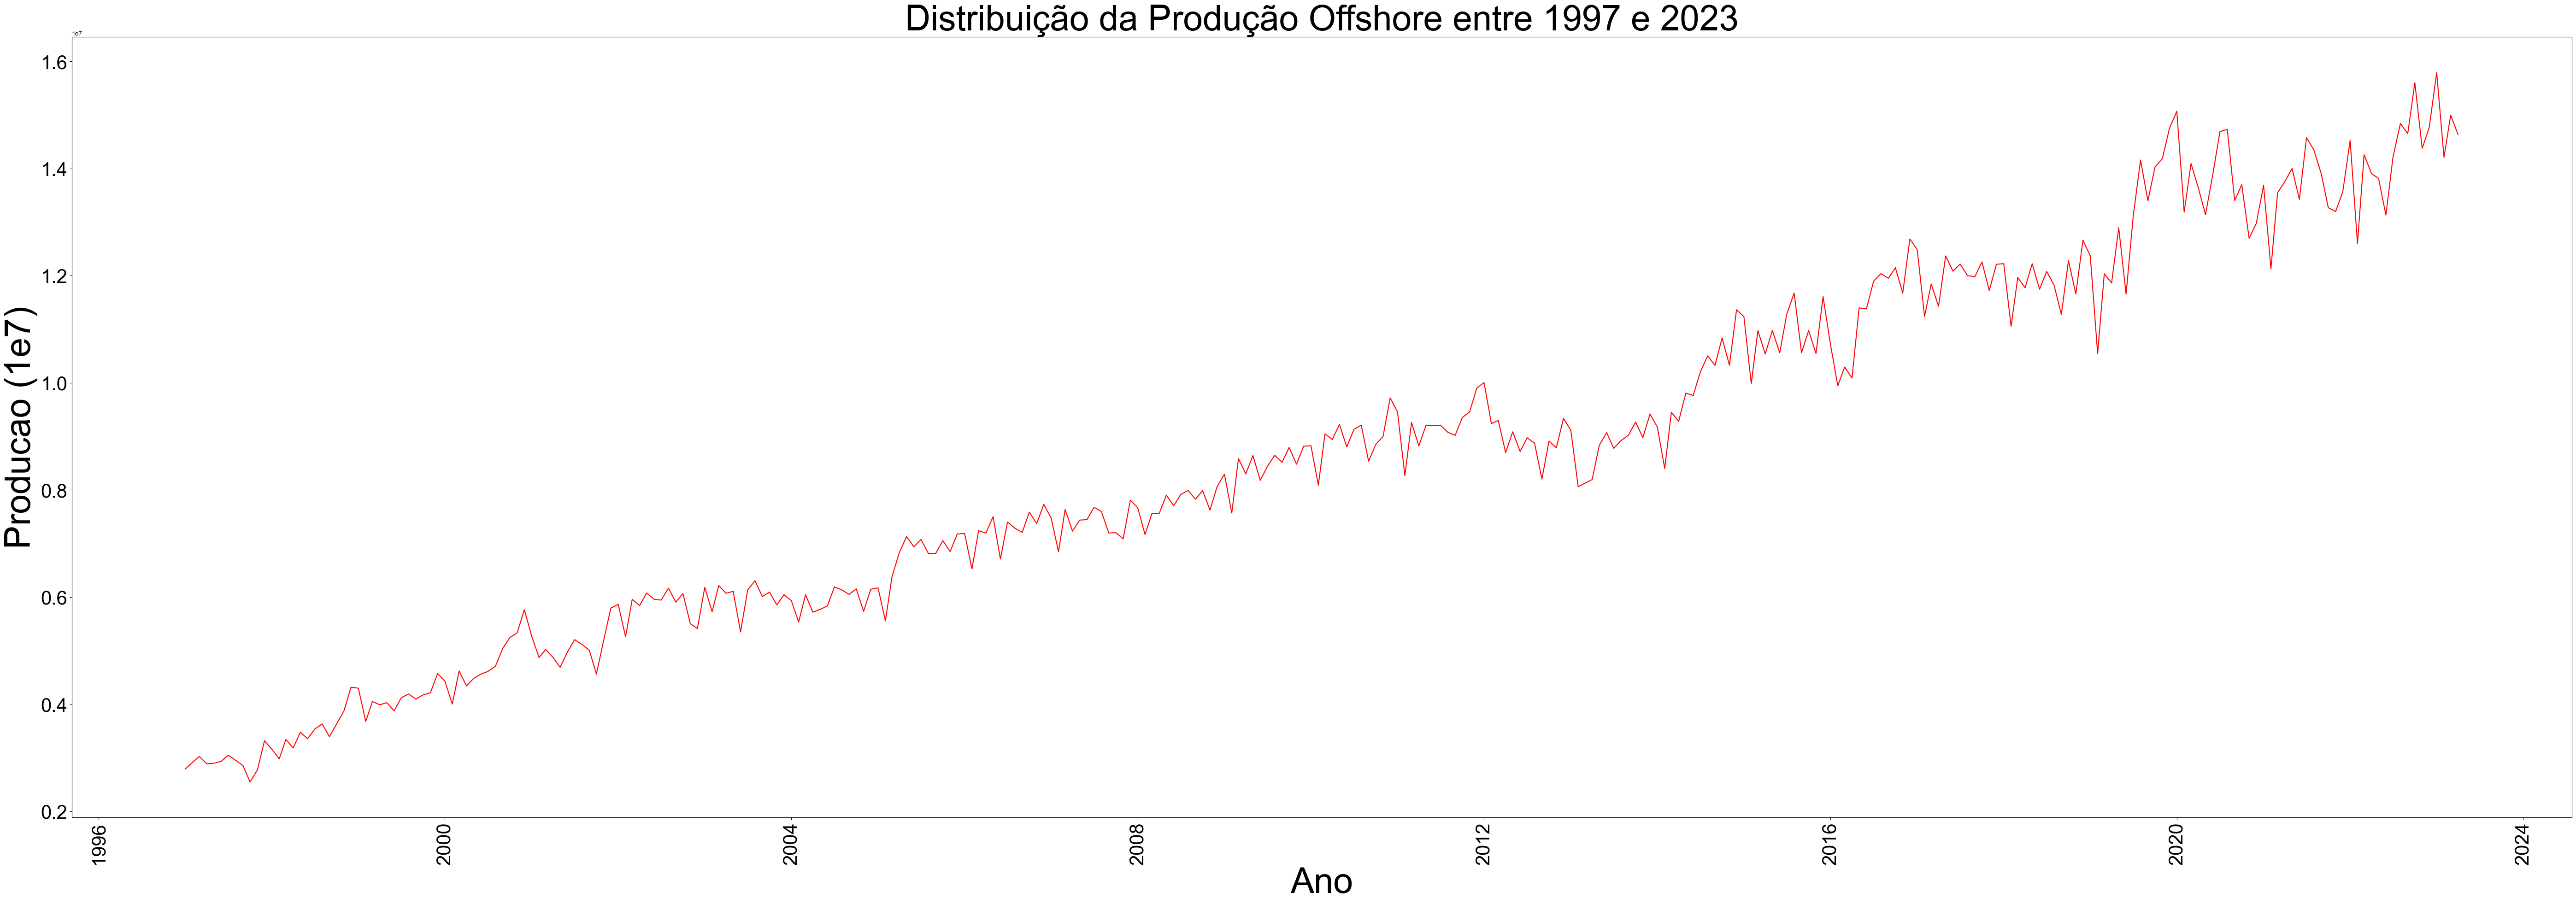

In [22]:
plt.figure(figsize=(70,22))

plt.title('Distribuição da Produção Offshore entre 1997 e 2023', fontsize=55)

sns.lineplot(data=data_trat_unif, x=x, y=y, color='red')

sns.set_theme(style="darkgrid")

plt.xlabel('Ano', fontsize=55)
plt.ylabel('Producao (1e7)', fontsize=55)

plt.xticks(rotation=90,fontsize=30)
plt.yticks(fontsize=30)

plt.savefig('distribuicao_offshore_graf_linhas.png')
plt.show()

<AxesSubplot:>

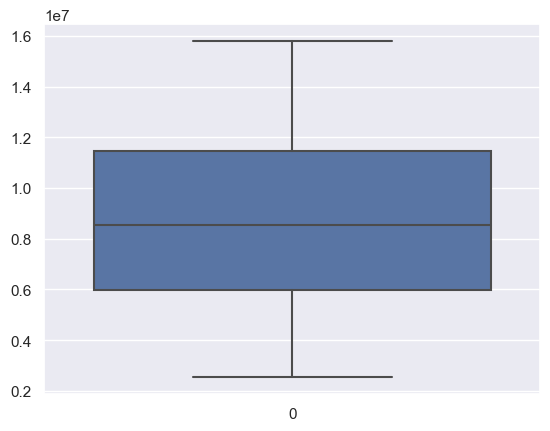

In [23]:
sns.boxplot(data=y)

**Visualização dos dados:** Plotando os dados de produção versus tempo em um gráfico para ter uma noção inicial de como a série temporal se comporta ao longo do tempo.
Gráficos de linha ou gráficos de dispersão são úteis para visualizar os padrões e tendências.

In [ ]:
plt.figure(figsize=(70,15))


sns.scatterplot(data=data_trat_unif,x=x,y=y)

plt.title('Grafico Dispersao da producao offshore entre 1997 e 2023',fontsize=65 )

plt.xlabel('Ano', fontsize=45)
plt.ylabel('Producao', fontsize=45)

plt.xticks(rotation=90,fontsize=30)
plt.yticks(fontsize=30)

plt.savefig('distribuicao_offshore.png')
plt.show()

## **2.Identificação de padrões sazonais:** 

Verificação da  existência de padrões sazonais ou repetitivos nos dados. Isso pode ajudar a entender se a produção segue um padrão específico em determinadas épocas do ano ou de forma recorrente.

### Calculo da auto Correlação

A autocorrelação mede a relação entre os valores de uma série e seus valores atrasados em relação ao tempo. Se houver padrões sazonais, haverá picos significativos na função de autocorrelação em intervalos regulares, correspondentes ao período sazonal.

In [25]:
# Criação de uma série temporal usando Pandas
dados = data_trat_unif.loc[:,['tempo_num','Tot_prod']]


# Convertendo a coluna 'Tot_prod' para o tipo numérico (float)
dados['Tot_prod'] = pd.to_numeric(dados['Tot_prod'], errors='coerce')

# Definindo 'tempo_num' como o índice da série temporal
dados.set_index('tempo_num', inplace=True)

# Criando a série temporal
serie_temporal = pd.Series(dados['Tot_prod'])

In [26]:
# Calculo da autocorrelação com lag (atraso) de 1
autocorrelacao_lag_1 = serie_temporal.autocorr(lag=1)

# Calculo da autocorrelação com lag (atraso) de 2
autocorrelacao_lag_2 = serie_temporal.autocorr(lag=2)

# Calculo daa autocorrelação com lag (atraso) de 3
autocorrelacao_lag_3 = serie_temporal.autocorr(lag=3)

# Calculo da autocorrelação com lag (atraso) de 4
autocorrelacao_lag_4 = serie_temporal.autocorr(lag=4)

# Resultados
print("Autocorrelação com lag 1:", autocorrelacao_lag_1)
print("Autocorrelação com lag 2:", autocorrelacao_lag_2)
print("Autocorrelação com lag 3:", autocorrelacao_lag_3)
print("Autocorrelação com lag 4:", autocorrelacao_lag_4)

Autocorrelação com lag 1: 0.7568026197538893
Autocorrelação com lag 2: 0.5579329396232666
Autocorrelação com lag 3: 0.3792871646751186
Autocorrelação com lag 4: 0.19396738877257766


Autocorrelação é um valor entre -1 e 1, onde -1 indica uma autocorrelação perfeita negativa, 0 indica nenhuma autocorrelação e 1 indica uma autocorrelação perfeita positiva. Ou seja, valores próximos de -1 ou 1 indicam uma forte autocorrelação, enquanto valores próximos de 0 indicam uma autocorrelação fraca ou nula

A autocorrelação com atrasos positivos geralmente indica um padrão sazonala lém de uma relação linear positiva entre os valores da série em diferentes lags

Com os valores de autocorrelação para lags 1 e 2, há uma ideia da dependência entre os valores da série temporal "Tot_prod" em diferentes períodos de tempo. 

Aqui a  autocorrelação com lag 1 é de 0.7568 e a autocorrelação com lag 2 é de 0.5579. 

Isso sugere que há uma correlação moderada a forte entre os valores da série nos períodos imediatamente anteriores (lag 1) e nos períodos com dois intervalos anteriores (lag 2).

### Gráfico de autorrelacao em intervalos regulares correspondente ao periodo sazonal

Plot de  função de autocorrelação para diferentes lags (atrasos) 

<Figure size 1200x600 with 0 Axes>

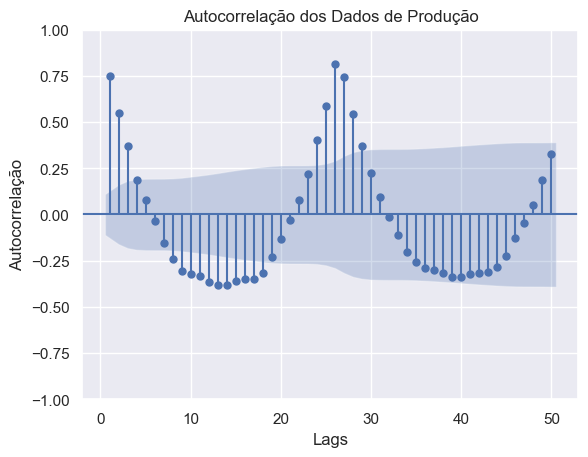

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12, 6))
plot_acf(y, lags=50, zero=False)
plt.xlabel('Lags')
plt.ylabel('Autocorrelação')
plt.title('Autocorrelação dos Dados de Produção')
plt.savefig('Autocorrelacao_offshore.png')
plt.show()


## **3.Decomposição da série temporal:**


Utilização de técnicas de decomposição para separar a série temporal em componentes de tendência, sazonalidade e resíduos. Isso permitirá entender a contribuição de cada componente na série.

Utilização da biblioteca StatsModels em Python. A função seasonal_decompose() dessa biblioteca é bastante útil para esse propósito.

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

A decomposição foi baseada no Filtro de Kalman é um método avançado de decomposição de série temporal que usa o Filtro de Kalman, uma técnica de estimação recursiva, para separar as componentes de tendência e sazonalidade dos dados. Aqui, foi realizada a decomposição usando o Filtro de Kalman em Python de forma básica.

In [29]:
from pykalman import KalmanFilter

In [30]:
#Vamos converter a coluna "producao" em uma série temporal
# Vamos usar o valor do índice como a data (nesse exemplo, não temos informações de datas reais)
serie_temporal = pd.to_numeric(data_trat_unif['producao'].apply(lambda x: x[0].replace(',', '.')))

# Convertendo a série temporal para um array numpy
data_array = np.array(serie_temporal.tolist())

In [31]:
# Definindo a matriz de transição do Filtro de Kalman
transition_matrix = np.array([[1, 1], [0, 1]])

# Definindo a matriz de observação do Filtro de Kalman
observation_matrix = np.array([[1, 0]])

# Criando o modelo do Filtro de Kalman
kf = KalmanFilter(transition_matrices=transition_matrix,
                  observation_matrices=observation_matrix)

# Ajustando o modelo ao array da série temporal
kf = kf.em(data_array, n_iter=10)

In [32]:
# Obtendo as estimativas de tendência e sazonalidade
(filtered_state_means, filtered_state_covariances) = kf.filter(data_array)

# A primeira coluna contém as estimativas de tendência
tendencia = filtered_state_means[:, 0]

# A segunda coluna contém as estimativas de sazonalidade
sazonalidade = filtered_state_means[:, 1]

# Obtendo a estimativa do ruído (residual) em cada ponto
ruido_estimado = data_array - filtered_state_means[:, 0] - filtered_state_means[:, 1]

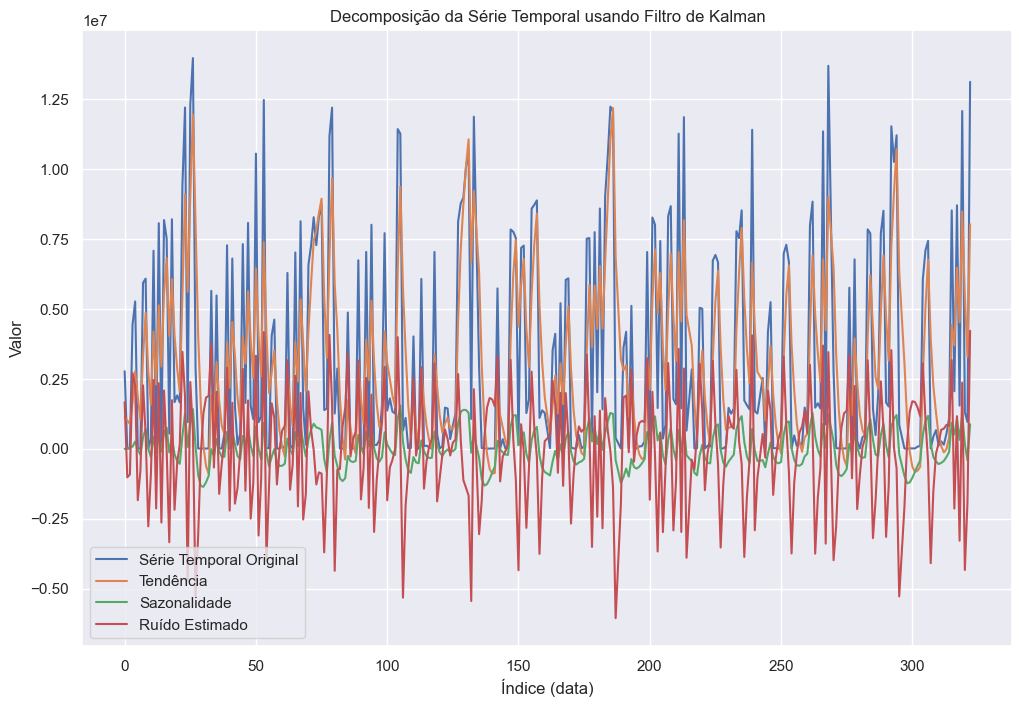

In [33]:
# Plotando a série temporal original, tendência, sazonalidade e ruído estimado
plt.figure(figsize=(12, 8))
plt.plot(serie_temporal.index, data_array, label='Série Temporal Original')
plt.plot(serie_temporal.index, filtered_state_means[:, 0], label='Tendência')
plt.plot(serie_temporal.index, filtered_state_means[:, 1], label='Sazonalidade')
plt.plot(serie_temporal.index, ruido_estimado, label='Ruído Estimado')
plt.legend()
plt.xlabel('Índice (data)')
plt.ylabel('Valor')
plt.title('Decomposição da Série Temporal usando Filtro de Kalman')
plt.savefig('decomposicao_kalman_c_ruido.png')
plt.show()

**Série Original**: Ssérie temporal original, observaos os valores ao longo do tempo. Aqui, identificamos tendências, sazonalidades e eventuais padrões ou outliers.

**Tendência**: O gráfico da tendência mostra a evolução de longo prazo dos dados, filtrando as variações de curto prazo. 

**Sazonalidade**: O gráfico da sazonalidade destaca os padrões que se repetem em intervalos regulares.

**Resíduos**: O gráfico dos resíduos mostra as variações que não puderam ser explicadas pela tendência ou sazonalidade. Os resíduos são basicamente o que sobra após remover a tendência e a sazonalidade da série temporal. Idealmente, os resíduos devem ser aleatórios e não mostrar nenhum padrão claro. Caso hajam padrões nos resíduos, pode ser um indicativo de que a decomposição não capturou todas as informações relevantes da série.

## **Teste de Estacionaridade ADF**

É um teste estatístico usado para verificar a estacionariedade de uma série temporal. A hipótese nula do teste é que a série possui raiz unitária, o que indica que é não estacionária.O que significa que suas propriedades estatísticas mudam ao longo do tempo e, portanto, é mais difícil de prever. Por outro lado, uma série temporal estacionária possui propriedades estatísticas constantes ao longo do tempo e é mais adequada para modelagem e previsão.


In [34]:
#Biblioteca
from statsmodels.tsa.stattools import adfuller

In [35]:
serie_temporal=data_trat_unif['Tot_prod']

result = adfuller(serie_temporal)

print('Estatística ADF:', result[0])
print('Valor-p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

Estatística ADF: -9.75131894179177
Valor-p: 8.001673447417278e-17
Valores críticos:
	1%: -3.4524113009049935
	5%: -2.8712554127251764
	10%: -2.571946570731871


A **estatística ADF** é um valor negativo e mais negativo do que os valores críticos. Quanto mais negativa essa estatística, mais forte é a evidência contra a presença de raiz unitária na série. 
Neste caso, a estatística ADF é negativa, indicando que a série provavelmente é estacionária.

O **valor-p** é a probabilidade de obter uma estatística de teste ADF igual ou mais extrema que a observada, assumindo que a hipótese nula (a série tem uma raiz unitária, ou seja, é não estacionária) é verdadeira. Um valor-p muito baixo (geralmente menor que 0,05) sugere que podemos rejeitar a hipótese nula e concluir que a série é estacionária. Neste caso, o valor-p é muito próximo de zero, o que indica que a série é estacionária.

Os **valores críticos** são limiares predefinidos para diferentes níveis de significância (1%, 5% e 10%). Eles são usados para comparar com a estatística ADF e determinar se a série é estacionária. Se a estatística ADF for mais negativa do que os valores críticos, podemos rejeitar a hipótese nula e concluir que a série é estacionária.

Se a estatística ADF é muito mais negativa do que os três valores críticos, reforça a evidência de que a série é estacionária.

Em resumo, com base nos resultados do teste ADF, podemos concluir que a **série temporal é estacionária**. Isso significa que ela possui propriedades estatísticas constantes ao longo do tempo, o que facilita a modelagem e previsão.

## 4. Usando o LSTM

Uso das bibliotecas : TensorFlow (ou Keras, que é uma API de alto nível para TensorFlow), NumPy e Pandas.


**Bibliotecas complementares**

In [36]:
from pandas import Series
from decimal import Decimal
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, make_scorer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
import numpy as np

## 4.1 Busca pelos melhores parametros 

Para ajustar os hiperparâmetros da sua rede neural, você pode realizar uma busca de grade (_grid search_) ou uma busca aleatória (_random search_). Vamos proceder com uma busca aleatória, já que isso pode ser mais eficiente.

Primeiro, você precisa definir a grade de hiperparâmetros que deseja explorar. No seu caso, os hiperparâmetros incluem o número de neurônios, o tamanho do lote (_batch size_), e o número de épocas.

In [37]:
df=data_trat_unif.loc[:,['tempo_num','Tot_prod']]

df['tempo_num'] = pd.to_datetime(df['tempo_num'])
df.set_index('tempo_num', inplace=True)

train_data = df['Tot_prod'].iloc[:-18].dropna().astype(float)
test_data = df['Tot_prod'].iloc[-18:].dropna().astype(float)

seq_length=12 #12 ultimas amostragens em anos

In [38]:
# Função para criar sequências
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        X.append(seq)
        y.append(label)
    return np.array(X), np.array(y)

In [39]:
# Normalizar os dados
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_data_normalized = scaler.transform(test_data.values.reshape(-1, 1))

# Criar sequências para treinamento e teste
seq_length=12
X_train, y_train = create_sequences(train_data_normalized, seq_length)
X_test, y_test = create_sequences(test_data_normalized, seq_length)

# Certificar-se de que y_train e y_test são arrays 1D
y_train = y_train.ravel()
y_test = y_test.ravel()

# reshape para (amostras, características)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))

In [40]:
# reshape para (amostras, características)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))

# Definir a métrica de avaliação (pode ser ajustada conforme necessário)
scorer = make_scorer(mean_squared_error, greater_is_better=False)


In [41]:
# Definir os hiperparâmetros para busca aleatória
param_dist = {
    'hidden_layer_sizes': [(4,), (8,), (16,), (32,)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200,400,600,700,1000]
}

In [42]:
# Criar o modelo MLPRegressor
mlp_model = MLPRegressor(max_iter=1500, learning_rate='adaptive', random_state=42)


In [43]:
# Realizar busca aleatória com validação temporal
tscv = TimeSeriesSplit(n_splits=3)
random_search = RandomizedSearchCV(estimator=mlp_model, scoring=scorer, param_distributions=param_dist, cv=tscv)
random_search.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                   estimator=MLPRegressor(learning_rate='adaptive',
                                          max_iter=1500, random_state=42),
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [(4,), (8,),
                                                               (16,), (32,)],
                                        'learning_rate_init': [0.001, 0.01,
                                                               0.1],
                                        'max_iter': [200, 400, 600, 700, 1000]},
                   scoring=make_scorer(mean_squared_error, greater_is_better=False))

**Logo os melhores parâmetros encontrados:**

In [44]:
print("Melhores Parâmetros Encontrados:", random_search.best_params_)

Melhores Parâmetros Encontrados: {'max_iter': 400, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (32,), 'alpha': 0.01, 'activation': 'identity'}


### Aplicando os Hiperparâmetros

Uma vez achados os melhores parâmetros para a rede neural. Vamos aplica-los a LSTM e obter a predição.

In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [46]:
# Função para criar sequências
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length:i+seq_length+1]  # Ajuste nesta linha
        X.append(seq)
        y.append(label)
    return np.array(X), np.array(y)


In [47]:

# Carregar e pré-processar os dados
df = data_trat_unif.loc[:, ['tempo_num', 'Tot_prod']]
df['tempo_num'] = pd.to_datetime(df['tempo_num'])
df.set_index('tempo_num', inplace=True)

train_data = df['Tot_prod'].iloc[:-18].dropna().astype(float)
test_data = df['Tot_prod'].iloc[-18:].dropna().astype(float)

In [48]:
# Normalizar os dados
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_data_normalized = scaler.transform(test_data.values.reshape(-1, 1))

In [49]:
# Ajustar os hiperparâmetros encontrados
lstm_params = {
    'max_iter': 1000,
    'learning_rate_init': 0.01,
    'hidden_layer_sizes': (32,),
    'alpha': 0.001,
    'activation': 'relu'
}

In [50]:
# Defina um novo valor para seq_length
new_seq_length = 14  # ou qualquer valor desejado menor que len(test_data_normalized)

# Crie sequências para treinamento e teste com o novo seq_length
X_train_lstm, y_train_lstm = create_sequences(train_data_normalized, new_seq_length)
X_test_lstm, y_test_lstm = create_sequences(test_data_normalized, new_seq_length)

# Certifique-se de que y_train_lstm e y_test_lstm são arrays 1D
y_train_lstm = y_train_lstm.ravel()
y_test_lstm = y_test_lstm.ravel()

# Reshape para (amostras, passos do tempo, características)
X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], 1, X_train_lstm.shape[1]))
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], 1, X_test_lstm.shape[1]))


In [51]:
# Criar o modelo LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(units=lstm_params['hidden_layer_sizes'][0], input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), activation=lstm_params['activation']))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [52]:

# Treinar o modelo com histórico
history =lstm_model.fit(X_train_lstm, y_train_lstm, epochs=lstm_params['max_iter'], batch_size=1, verbose=2)


Epoch 1/1000
284/284 - 1s - loss: 0.0839 - accuracy: 0.0000e+00 - 1s/epoch - 5ms/step
Epoch 2/1000
284/284 - 1s - loss: 0.0386 - accuracy: 0.0035 - 636ms/epoch - 2ms/step
Epoch 3/1000
284/284 - 1s - loss: 0.0334 - accuracy: 0.0035 - 576ms/epoch - 2ms/step
Epoch 4/1000
284/284 - 1s - loss: 0.0289 - accuracy: 0.0035 - 567ms/epoch - 2ms/step
Epoch 5/1000
284/284 - 0s - loss: 0.0278 - accuracy: 0.0035 - 427ms/epoch - 2ms/step
Epoch 6/1000
284/284 - 0s - loss: 0.0263 - accuracy: 0.0035 - 464ms/epoch - 2ms/step
Epoch 7/1000
284/284 - 1s - loss: 0.0249 - accuracy: 0.0035 - 634ms/epoch - 2ms/step
Epoch 8/1000
284/284 - 1s - loss: 0.0247 - accuracy: 0.0035 - 635ms/epoch - 2ms/step
Epoch 9/1000
284/284 - 1s - loss: 0.0266 - accuracy: 0.0035 - 546ms/epoch - 2ms/step
Epoch 10/1000
284/284 - 1s - loss: 0.0249 - accuracy: 0.0035 - 594ms/epoch - 2ms/step
Epoch 11/1000
284/284 - 1s - loss: 0.0227 - accuracy: 0.0035 - 568ms/epoch - 2ms/step
Epoch 12/1000
284/284 - 1s - loss: 0.0244 - accuracy: 0.0035 -

Epoch 97/1000
284/284 - 1s - loss: 0.0055 - accuracy: 0.0070 - 596ms/epoch - 2ms/step
Epoch 98/1000
284/284 - 1s - loss: 0.0062 - accuracy: 0.0070 - 557ms/epoch - 2ms/step
Epoch 99/1000
284/284 - 1s - loss: 0.0060 - accuracy: 0.0070 - 593ms/epoch - 2ms/step
Epoch 100/1000
284/284 - 1s - loss: 0.0064 - accuracy: 0.0070 - 532ms/epoch - 2ms/step
Epoch 101/1000
284/284 - 1s - loss: 0.0051 - accuracy: 0.0070 - 555ms/epoch - 2ms/step
Epoch 102/1000
284/284 - 1s - loss: 0.0078 - accuracy: 0.0070 - 551ms/epoch - 2ms/step
Epoch 103/1000
284/284 - 1s - loss: 0.0083 - accuracy: 0.0070 - 575ms/epoch - 2ms/step
Epoch 104/1000
284/284 - 1s - loss: 0.0064 - accuracy: 0.0070 - 560ms/epoch - 2ms/step
Epoch 105/1000
284/284 - 0s - loss: 0.0051 - accuracy: 0.0070 - 494ms/epoch - 2ms/step
Epoch 106/1000
284/284 - 1s - loss: 0.0060 - accuracy: 0.0070 - 561ms/epoch - 2ms/step
Epoch 107/1000
284/284 - 1s - loss: 0.0065 - accuracy: 0.0070 - 542ms/epoch - 2ms/step
Epoch 108/1000
284/284 - 1s - loss: 0.0077 - a

Epoch 192/1000
284/284 - 1s - loss: 0.0046 - accuracy: 0.0070 - 643ms/epoch - 2ms/step
Epoch 193/1000
284/284 - 1s - loss: 0.0053 - accuracy: 0.0070 - 512ms/epoch - 2ms/step
Epoch 194/1000
284/284 - 1s - loss: 0.0050 - accuracy: 0.0070 - 662ms/epoch - 2ms/step
Epoch 195/1000
284/284 - 1s - loss: 0.0048 - accuracy: 0.0070 - 690ms/epoch - 2ms/step
Epoch 196/1000
284/284 - 1s - loss: 0.0048 - accuracy: 0.0070 - 660ms/epoch - 2ms/step
Epoch 197/1000
284/284 - 0s - loss: 0.0045 - accuracy: 0.0070 - 468ms/epoch - 2ms/step
Epoch 198/1000
284/284 - 0s - loss: 0.0040 - accuracy: 0.0070 - 490ms/epoch - 2ms/step
Epoch 199/1000
284/284 - 0s - loss: 0.0048 - accuracy: 0.0070 - 490ms/epoch - 2ms/step
Epoch 200/1000
284/284 - 1s - loss: 0.0032 - accuracy: 0.0070 - 602ms/epoch - 2ms/step
Epoch 201/1000
284/284 - 1s - loss: 0.0039 - accuracy: 0.0070 - 583ms/epoch - 2ms/step
Epoch 202/1000
284/284 - 1s - loss: 0.0059 - accuracy: 0.0070 - 649ms/epoch - 2ms/step
Epoch 203/1000
284/284 - 1s - loss: 0.0050 

284/284 - 1s - loss: 0.0036 - accuracy: 0.0070 - 525ms/epoch - 2ms/step
Epoch 287/1000
284/284 - 1s - loss: 0.0041 - accuracy: 0.0070 - 558ms/epoch - 2ms/step
Epoch 288/1000
284/284 - 1s - loss: 0.0035 - accuracy: 0.0070 - 514ms/epoch - 2ms/step
Epoch 289/1000
284/284 - 1s - loss: 0.0036 - accuracy: 0.0070 - 608ms/epoch - 2ms/step
Epoch 290/1000
284/284 - 1s - loss: 0.0047 - accuracy: 0.0070 - 589ms/epoch - 2ms/step
Epoch 291/1000
284/284 - 0s - loss: 0.0036 - accuracy: 0.0070 - 425ms/epoch - 1ms/step
Epoch 292/1000
284/284 - 1s - loss: 0.0038 - accuracy: 0.0070 - 599ms/epoch - 2ms/step
Epoch 293/1000
284/284 - 1s - loss: 0.0043 - accuracy: 0.0070 - 526ms/epoch - 2ms/step
Epoch 294/1000
284/284 - 1s - loss: 0.0040 - accuracy: 0.0070 - 507ms/epoch - 2ms/step
Epoch 295/1000
284/284 - 1s - loss: 0.0032 - accuracy: 0.0070 - 533ms/epoch - 2ms/step
Epoch 296/1000
284/284 - 1s - loss: 0.0041 - accuracy: 0.0070 - 502ms/epoch - 2ms/step
Epoch 297/1000
284/284 - 1s - loss: 0.0035 - accuracy: 0.0

Epoch 381/1000
284/284 - 1s - loss: 0.0034 - accuracy: 0.0070 - 540ms/epoch - 2ms/step
Epoch 382/1000
284/284 - 1s - loss: 0.0039 - accuracy: 0.0070 - 596ms/epoch - 2ms/step
Epoch 383/1000
284/284 - 1s - loss: 0.0029 - accuracy: 0.0070 - 619ms/epoch - 2ms/step
Epoch 384/1000
284/284 - 1s - loss: 0.0029 - accuracy: 0.0070 - 554ms/epoch - 2ms/step
Epoch 385/1000
284/284 - 1s - loss: 0.0044 - accuracy: 0.0070 - 560ms/epoch - 2ms/step
Epoch 386/1000
284/284 - 1s - loss: 0.0031 - accuracy: 0.0070 - 559ms/epoch - 2ms/step
Epoch 387/1000
284/284 - 1s - loss: 0.0026 - accuracy: 0.0070 - 659ms/epoch - 2ms/step
Epoch 388/1000
284/284 - 0s - loss: 0.0033 - accuracy: 0.0070 - 467ms/epoch - 2ms/step
Epoch 389/1000
284/284 - 1s - loss: 0.0045 - accuracy: 0.0070 - 576ms/epoch - 2ms/step
Epoch 390/1000
284/284 - 1s - loss: 0.0030 - accuracy: 0.0070 - 530ms/epoch - 2ms/step
Epoch 391/1000
284/284 - 0s - loss: 0.0030 - accuracy: 0.0070 - 443ms/epoch - 2ms/step
Epoch 392/1000
284/284 - 1s - loss: 0.0035 

Epoch 476/1000
284/284 - 1s - loss: 0.0031 - accuracy: 0.0070 - 721ms/epoch - 3ms/step
Epoch 477/1000
284/284 - 1s - loss: 0.0030 - accuracy: 0.0070 - 609ms/epoch - 2ms/step
Epoch 478/1000
284/284 - 1s - loss: 0.0036 - accuracy: 0.0070 - 558ms/epoch - 2ms/step
Epoch 479/1000
284/284 - 1s - loss: 0.0024 - accuracy: 0.0070 - 775ms/epoch - 3ms/step
Epoch 480/1000
284/284 - 1s - loss: 0.0025 - accuracy: 0.0070 - 930ms/epoch - 3ms/step
Epoch 481/1000
284/284 - 1s - loss: 0.0032 - accuracy: 0.0070 - 753ms/epoch - 3ms/step
Epoch 482/1000
284/284 - 1s - loss: 0.0033 - accuracy: 0.0070 - 841ms/epoch - 3ms/step
Epoch 483/1000
284/284 - 1s - loss: 0.0025 - accuracy: 0.0070 - 721ms/epoch - 3ms/step
Epoch 484/1000
284/284 - 1s - loss: 0.0032 - accuracy: 0.0070 - 726ms/epoch - 3ms/step
Epoch 485/1000
284/284 - 1s - loss: 0.0044 - accuracy: 0.0070 - 747ms/epoch - 3ms/step
Epoch 486/1000
284/284 - 1s - loss: 0.0036 - accuracy: 0.0070 - 714ms/epoch - 3ms/step
Epoch 487/1000
284/284 - 1s - loss: 0.0036 

284/284 - 1s - loss: 0.0029 - accuracy: 0.0070 - 541ms/epoch - 2ms/step
Epoch 571/1000
284/284 - 0s - loss: 0.0032 - accuracy: 0.0070 - 472ms/epoch - 2ms/step
Epoch 572/1000
284/284 - 1s - loss: 0.0030 - accuracy: 0.0070 - 542ms/epoch - 2ms/step
Epoch 573/1000
284/284 - 1s - loss: 0.0030 - accuracy: 0.0070 - 576ms/epoch - 2ms/step
Epoch 574/1000
284/284 - 0s - loss: 0.0038 - accuracy: 0.0070 - 366ms/epoch - 1ms/step
Epoch 575/1000
284/284 - 1s - loss: 0.0027 - accuracy: 0.0070 - 520ms/epoch - 2ms/step
Epoch 576/1000
284/284 - 1s - loss: 0.0034 - accuracy: 0.0070 - 622ms/epoch - 2ms/step
Epoch 577/1000
284/284 - 1s - loss: 0.0023 - accuracy: 0.0070 - 601ms/epoch - 2ms/step
Epoch 578/1000
284/284 - 1s - loss: 0.0037 - accuracy: 0.0070 - 530ms/epoch - 2ms/step
Epoch 579/1000
284/284 - 1s - loss: 0.0025 - accuracy: 0.0070 - 762ms/epoch - 3ms/step
Epoch 580/1000
284/284 - 1s - loss: 0.0025 - accuracy: 0.0070 - 840ms/epoch - 3ms/step
Epoch 581/1000
284/284 - 1s - loss: 0.0023 - accuracy: 0.0

Epoch 665/1000
284/284 - 1s - loss: 0.0023 - accuracy: 0.0070 - 563ms/epoch - 2ms/step
Epoch 666/1000
284/284 - 0s - loss: 0.0024 - accuracy: 0.0070 - 477ms/epoch - 2ms/step
Epoch 667/1000
284/284 - 0s - loss: 0.0025 - accuracy: 0.0070 - 492ms/epoch - 2ms/step
Epoch 668/1000
284/284 - 1s - loss: 0.0030 - accuracy: 0.0070 - 519ms/epoch - 2ms/step
Epoch 669/1000
284/284 - 1s - loss: 0.0018 - accuracy: 0.0070 - 589ms/epoch - 2ms/step
Epoch 670/1000
284/284 - 1s - loss: 0.0022 - accuracy: 0.0070 - 611ms/epoch - 2ms/step
Epoch 671/1000
284/284 - 1s - loss: 0.0030 - accuracy: 0.0070 - 556ms/epoch - 2ms/step
Epoch 672/1000
284/284 - 1s - loss: 0.0032 - accuracy: 0.0070 - 528ms/epoch - 2ms/step
Epoch 673/1000
284/284 - 1s - loss: 0.0027 - accuracy: 0.0070 - 564ms/epoch - 2ms/step
Epoch 674/1000
284/284 - 1s - loss: 0.0029 - accuracy: 0.0070 - 591ms/epoch - 2ms/step
Epoch 675/1000
284/284 - 1s - loss: 0.0023 - accuracy: 0.0070 - 612ms/epoch - 2ms/step
Epoch 676/1000
284/284 - 1s - loss: 0.0042 

284/284 - 1s - loss: 0.0036 - accuracy: 0.0070 - 507ms/epoch - 2ms/step
Epoch 760/1000
284/284 - 1s - loss: 0.0023 - accuracy: 0.0070 - 576ms/epoch - 2ms/step
Epoch 761/1000
284/284 - 1s - loss: 0.0021 - accuracy: 0.0070 - 585ms/epoch - 2ms/step
Epoch 762/1000
284/284 - 1s - loss: 0.0026 - accuracy: 0.0070 - 607ms/epoch - 2ms/step
Epoch 763/1000
284/284 - 1s - loss: 0.0027 - accuracy: 0.0070 - 562ms/epoch - 2ms/step
Epoch 764/1000
284/284 - 1s - loss: 0.0024 - accuracy: 0.0070 - 619ms/epoch - 2ms/step
Epoch 765/1000
284/284 - 1s - loss: 0.0025 - accuracy: 0.0070 - 568ms/epoch - 2ms/step
Epoch 766/1000
284/284 - 1s - loss: 0.0032 - accuracy: 0.0070 - 530ms/epoch - 2ms/step
Epoch 767/1000
284/284 - 1s - loss: 0.0022 - accuracy: 0.0070 - 517ms/epoch - 2ms/step
Epoch 768/1000
284/284 - 1s - loss: 0.0025 - accuracy: 0.0070 - 552ms/epoch - 2ms/step
Epoch 769/1000
284/284 - 1s - loss: 0.0028 - accuracy: 0.0070 - 588ms/epoch - 2ms/step
Epoch 770/1000
284/284 - 1s - loss: 0.0028 - accuracy: 0.0

Epoch 854/1000
284/284 - 1s - loss: 0.0027 - accuracy: 0.0070 - 672ms/epoch - 2ms/step
Epoch 855/1000
284/284 - 1s - loss: 0.0025 - accuracy: 0.0070 - 629ms/epoch - 2ms/step
Epoch 856/1000
284/284 - 1s - loss: 0.0022 - accuracy: 0.0070 - 625ms/epoch - 2ms/step
Epoch 857/1000
284/284 - 1s - loss: 0.0019 - accuracy: 0.0070 - 613ms/epoch - 2ms/step
Epoch 858/1000
284/284 - 1s - loss: 0.0033 - accuracy: 0.0070 - 600ms/epoch - 2ms/step
Epoch 859/1000
284/284 - 1s - loss: 0.0027 - accuracy: 0.0070 - 579ms/epoch - 2ms/step
Epoch 860/1000
284/284 - 1s - loss: 0.0024 - accuracy: 0.0070 - 600ms/epoch - 2ms/step
Epoch 861/1000
284/284 - 1s - loss: 0.0022 - accuracy: 0.0070 - 774ms/epoch - 3ms/step
Epoch 862/1000
284/284 - 1s - loss: 0.0018 - accuracy: 0.0070 - 649ms/epoch - 2ms/step
Epoch 863/1000
284/284 - 1s - loss: 0.0021 - accuracy: 0.0070 - 794ms/epoch - 3ms/step
Epoch 864/1000
284/284 - 1s - loss: 0.0020 - accuracy: 0.0070 - 865ms/epoch - 3ms/step
Epoch 865/1000
284/284 - 1s - loss: 0.0024 

284/284 - 1s - loss: 0.0027 - accuracy: 0.0070 - 616ms/epoch - 2ms/step
Epoch 949/1000
284/284 - 1s - loss: 0.0020 - accuracy: 0.0070 - 628ms/epoch - 2ms/step
Epoch 950/1000
284/284 - 1s - loss: 0.0026 - accuracy: 0.0070 - 843ms/epoch - 3ms/step
Epoch 951/1000
284/284 - 1s - loss: 0.0030 - accuracy: 0.0070 - 914ms/epoch - 3ms/step
Epoch 952/1000
284/284 - 1s - loss: 0.0021 - accuracy: 0.0070 - 1s/epoch - 4ms/step
Epoch 953/1000
284/284 - 1s - loss: 0.0019 - accuracy: 0.0070 - 966ms/epoch - 3ms/step
Epoch 954/1000
284/284 - 1s - loss: 0.0022 - accuracy: 0.0070 - 857ms/epoch - 3ms/step
Epoch 955/1000
284/284 - 1s - loss: 0.0024 - accuracy: 0.0070 - 1s/epoch - 4ms/step
Epoch 956/1000
284/284 - 1s - loss: 0.0023 - accuracy: 0.0070 - 947ms/epoch - 3ms/step
Epoch 957/1000
284/284 - 1s - loss: 0.0019 - accuracy: 0.0070 - 853ms/epoch - 3ms/step
Epoch 958/1000
284/284 - 1s - loss: 0.0029 - accuracy: 0.0070 - 853ms/epoch - 3ms/step
Epoch 959/1000
284/284 - 1s - loss: 0.0019 - accuracy: 0.0070 - 

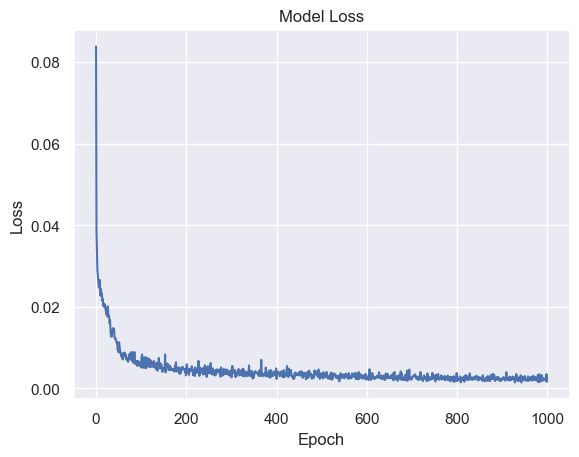

In [53]:
# Plotar a perda (loss) ao longo do treinamento
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [54]:
# Avaliar o modelo
train_predict = lstm_model.predict(X_train_lstm)
test_predict = lstm_model.predict(X_test_lstm)

1/1 [==============================] - 0s 33ms/step


In [55]:
# Inverter a normalização para obter os resultados em escala original
train_predict = scaler.inverse_transform(train_predict)
y_train_lstm_inv = scaler.inverse_transform([y_train_lstm])
#y_train_lstm_inv=y_train_lstm
test_predict = scaler.inverse_transform(test_predict)
y_test_lstm_inv = scaler.inverse_transform([y_test_lstm])
#y_test_lstm_inv=y_test_lstm

In [56]:
# Ajustar o índice de df para coincidir com o tamanho do conjunto de treinamento
df_train = df.iloc[seq_length:seq_length+len(train_predict)]

In [57]:
print("Dimensões dos dados de treinamento:")
print(f"y_train_lstm_inv: {y_train_lstm_inv.shape}")
print(f"train_predict: {train_predict.shape}")

print("\nDimensões dos dados de teste:")
print(f"y_test_lstm_inv: {y_test_lstm_inv.shape}")
print(f"test_predict: {test_predict.shape}")

Dimensões dos dados de treinamento:
y_train_lstm_inv: (1, 284)
train_predict: (284, 1)

Dimensões dos dados de teste:
y_test_lstm_inv: (1, 4)
test_predict: (4, 1)


In [58]:
y_test_lstm_inv = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

In [59]:
new_seq_length = 14  # ou qualquer valor desejado menor que len(test_data_normalized)

# Crie sequências para treinamento e teste com o novo seq_length
X_train_lstm, y_train_lstm = create_sequences(train_data_normalized, new_seq_length)
X_test_lstm, y_test_lstm = create_sequences(test_data_normalized, new_seq_length)

# Certifique-se de que y_train_lstm e y_test_lstm são arrays 1D
y_train_lstm = y_train_lstm.ravel()
y_test_lstm = y_test_lstm.ravel()

# Reshape para (amostras, passos do tempo, características)
X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], 1, X_train_lstm.shape[1]))
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], 1, X_test_lstm.shape[1]))


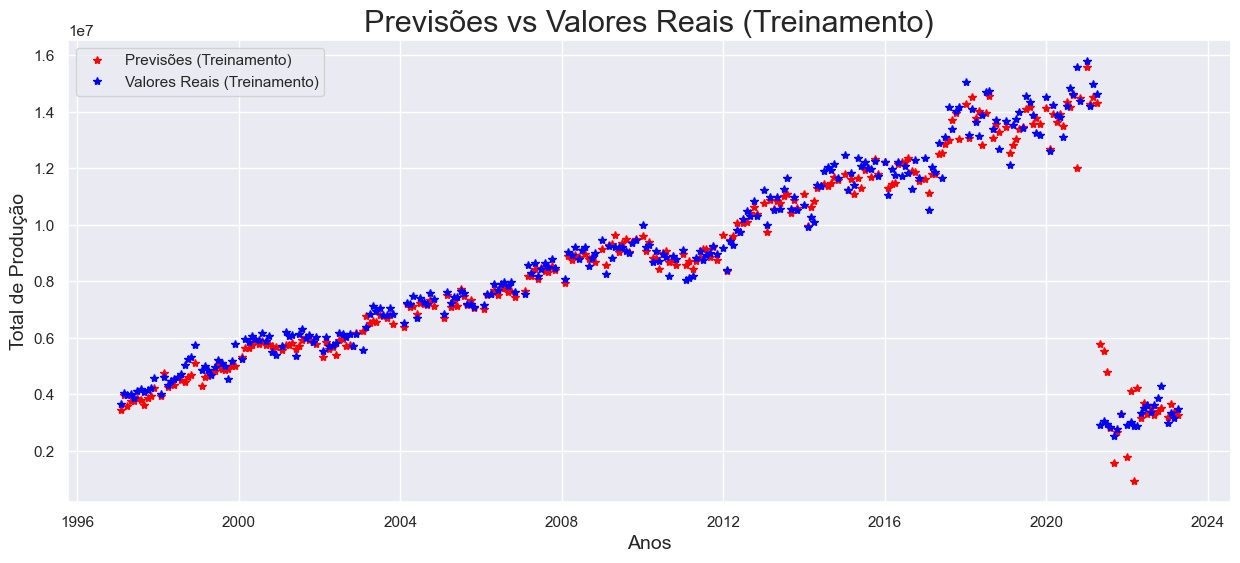

In [61]:
# Plotar os resultados de treinamento
plt.figure(figsize=(15, 6))
plt.plot(df.index[seq_length:seq_length+len(train_predict)], train_predict[:, 0], '*',label='Previsões (Treinamento)', color='red')
plt.plot(df.index[seq_length:seq_length+len(train_predict)], y_train_lstm_inv[0][:len(train_predict)],'*', label='Valores Reais (Treinamento)', color='blue')
plt.title('Previsões vs Valores Reais (Treinamento)', fontsize=22)
plt.xlabel('Anos', fontsize=14)
plt.ylabel('Total de Produção', fontsize=14)
plt.legend()
plt.show()

NameError: name 'raw_values' is not defined

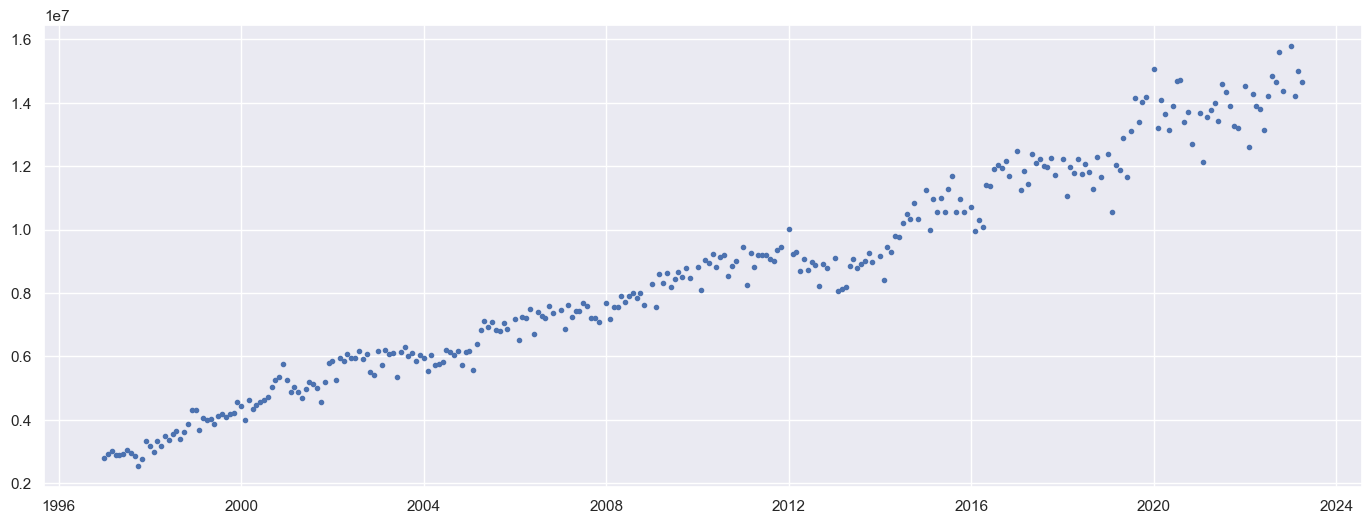

In [68]:
plt.figure(figsize=(17, 6))
plt.plot(train_data, '.',label= 'Série Temporal ')
plt.plot(test_data.index,raw_values[-18:],label= 'Dado Original Test Data')#Treinamento
plt.plot(df.index[-len(test_predict):], test_predict[:, 0],'*', label='Previsões (Teste)', color='red')

plt.title("Previsão Utilizando LSTM")
plt.xlabel('Ano')
plt.ylabel('Produção')
plt.legend()
plt.savefig('Previsão_LSTM.png')
plt.show()

### MAPE (Mean Absolute Percentage Error)

**MAPE** é uma métrica que mede o erro percentual médio nas previsões em relação aos valores reais. 
Ele é útil para avaliar o quão bem as previsões se ajustam aos dados reais em termos de porcentagem 
de erro médio.

In [70]:
train_score_mape = np.mean(np.abs((y_train_lstm_inv[0] - train_predict[:, 0]) / y_train_lstm_inv[0])) * 100
test_score_mape = np.mean(np.abs((y_test_lstm_inv - test_predict[:, 0]) / y_test_lstm_inv)) * 100


print(f'Treinamento MAPE: {train_score_mape:.2f}%')
print(f'Teste MAPE: {test_score_mape:.2f}%')

Treinamento MAPE: 5.01%
Teste MAPE: 12.92%


**Treinamento MAPE: 4.75%**: Isso significa que, em média, as previsões do  modelo no conjunto de treinamento têm um erro percentual absoluto médio de 8.43% em relação aos valores reais. Em outras palavras, as previsões do modelo estão, em média, a 8.43% do valor real.

**Teste MAPE: 11,58%**: Da mesma forma, no conjunto de teste, as previsões do modelo têm um erro percentual absoluto médio de 17.34% em relação aos valores reais. Isso indica que as previsões no conjunto de teste estão, em média, a 17.34% do valor real.

Em geral, valores mais baixos de MAPE são desejados, pois indicam uma precisão maior do modelo em fazer previsões próximas aos valores reais. No entanto, a interpretação exata pode depender do contexto específico do problema que você está resolvendo e das características dos dados.


## MSE

O **MSE** (Erro Quadrático Médio) é uma métrica que mede a média dos quadrados dos erros entre as previsões do modelo e os valores reais.

In [71]:
# Avaliar o desempenho MSE
train_score = mean_squared_error(y_train_lstm_inv[0], train_predict[:, 0])
print(f'Treinamento MSE: {train_score}')
test_score = mean_squared_error(y_test_lstm_inv[0], test_predict[:, 0])
print(f'Teste MSE: {test_score}')

Treinamento MSE: 253691883628.28372


ValueError: Found input variables with inconsistent numbers of samples: [1, 4]

Dado que a produção está na ordem de 1e^7 MSE não se torna o melhor parâmetro.